## Análisis de Información Recopilada - Clase Espejo Logro Académico

### Paso 1: Cargue de librerías

In [43]:
import warnings
warnings.filterwarnings('ignore')

##Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

##Librerías de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

### Cargue de la data

In [44]:
datos = pd.read_csv('./datosFinalesL.csv', sep=';', encoding='latin1')
datos.head()
datos.shape

(103, 26)

### Paso 2: Pre procesamiento de la data

In [45]:
##Renombrar las columnas
datos.columns = ['DemoEstrato','DemoEdad','DemoGenero','DemoSemestre','DemoPadres','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo','Pedag1','Pedag2','Pedag3','Pedag4','Pedag5','Pedag6','Pedag7','Pedag8','Pedag9','Pedag10','Pedag11','Pedag12','Pedag13','Pedag14','Pedag15','Pedag16','LogroAca']
datos.head()

data = datos.drop(['LogroAca'],axis=1)

In [46]:
##Demográficos
round(datos.DemoEstrato.value_counts()/np.float64(len(datos)),2)*100

##El 63% de la población es de estrato 2, 21% estrato 1 y el restante 16% estrato 3,4 y 5

DemoEstrato
2    63.0
1    21.0
3    10.0
4     4.0
5     2.0
Name: count, dtype: float64

In [47]:
round(datos.DemoEdad.value_counts()/np.float64(len(datos)),2)*100
#El 63% de la población se encuentran en el rango de edad 21 a 25 años
#El 21% entre 17 -20 años y el restante 16% son mayores de 25 años.

DemoEdad
2    63.0
1    21.0
3    16.0
Name: count, dtype: float64

In [48]:
round(datos.DemoGenero.value_counts()/np.float64(len(datos)),2)*100
#El 65% de los encuestados son hombres y el 35% son mujeres

DemoGenero
1    65.0
2    35.0
Name: count, dtype: float64

In [49]:
round(datos.DemoSemestre.value_counts()/np.float64(len(datos)),2)*100
#El 45% de las personas encuestadas pertenecen a decimo semestre, el 21% al noveno semestre, el 18% a septimo semestre y el 16% final a quinto semestre.

DemoSemestre
10    45.0
9     21.0
7     18.0
5     16.0
Name: count, dtype: float64

In [50]:
pd.crosstab(datos.DemoGenero, datos.DemoPadres, margins=True, margins_name="Total")
  #37 estudiantes del género masculino no viven con sus padres actualmente, 30 estudiantes del género masculino si conviven con sus padres
  #En el caso de las mujeres la relación es 17 no viven con sus padres y 19 si lo hacen actualmente.

DemoPadres,0,1,Total
DemoGenero,,,
1,37,30,67
2,17,19,36
Total,54,49,103


In [51]:
pd.crosstab(datos.DemoEstrato, datos.DemoPadres, margins=True, margins_name="Total")
#54 estudiantes de estratos 1 y 2 es donde se encuentran el mayor número que no vive con los padres.

DemoPadres,0,1,Total
DemoEstrato,,,
1,14,8,22
2,34,31,65
3,5,5,10
4,1,3,4
5,0,2,2
Total,54,49,103


In [52]:
pd.crosstab(datos.DemoEstrato, datos.DemoLaborando, margins=True, margins_name="Total")
#68 personas de los estratos 1,2,3,4 y5 no se encuentran laborando actualmente. 
# Los estratos 1 y 2 son los que mayor cantidad poblacional tienen en esa situacion

DemoLaborando,0,1,Total
DemoEstrato,,,
1,15,7,22
2,40,25,65
3,9,1,10
4,3,1,4
5,1,1,2
Total,68,35,103


In [53]:
pd.crosstab(datos.DemoGenero, datos.DemoEsMental, margins=True, margins_name="Total")
#41 hombres aducen que su trabajo no implica esfuerzo mental de igual manera 27 mujeres confirman la misma tendencia.

DemoEsMental,0,2,3,4,5,Total
DemoGenero,,,,,,
1,41,1,9,8,8,67
2,27,1,6,2,0,36
Total,68,2,15,10,8,103


### Paso 3: Gráficas mas Relevantes

In [54]:
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
def drawChart(dim, column1, column2, texto1, texto2, explod, preguntaC, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.05, fontsize=18, weight='bold')
    
    ##Grafica Matplotlib
    datos[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(['4 Siempre', '3 Casi siempre', '2 Algunas Veces','1 Casi Nunca', '0 Nunca'],loc=2, fontsize=10)
    
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(x= column1, data=datos,hue=column2,  ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    
    plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'], fontsize=10)
    plt.show() 

def drawChart2(dim, column1, column2, texto2, question, sizes):
  f, ax = plt.subplots(figsize=(sizes[0],sizes[1]))
  f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, question), x= 0.5, y =1.05, fontsize=18, weight='bold')

  plot = sns.countplot(x= column2, data=datos,hue=column1, palette=colors)
  for i in plot.patches:
      plot.annotate(i.get_height(),
                    (i.get_x() + i.get_width()/2, i.get_height()),
                    ha='center', va='baseline', fontsize=12, 
                    color='black', xytext=(0,1),
                    textcoords='offset points')
  ax.set_title(texto2,fontsize=14)
  ax.set_xlabel('', fontsize=12)
  ax.set_ylabel('', fontsize=12)
  ax.tick_params(labelsize=14)
  
  plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'],fontsize=10)
  plt.show() 


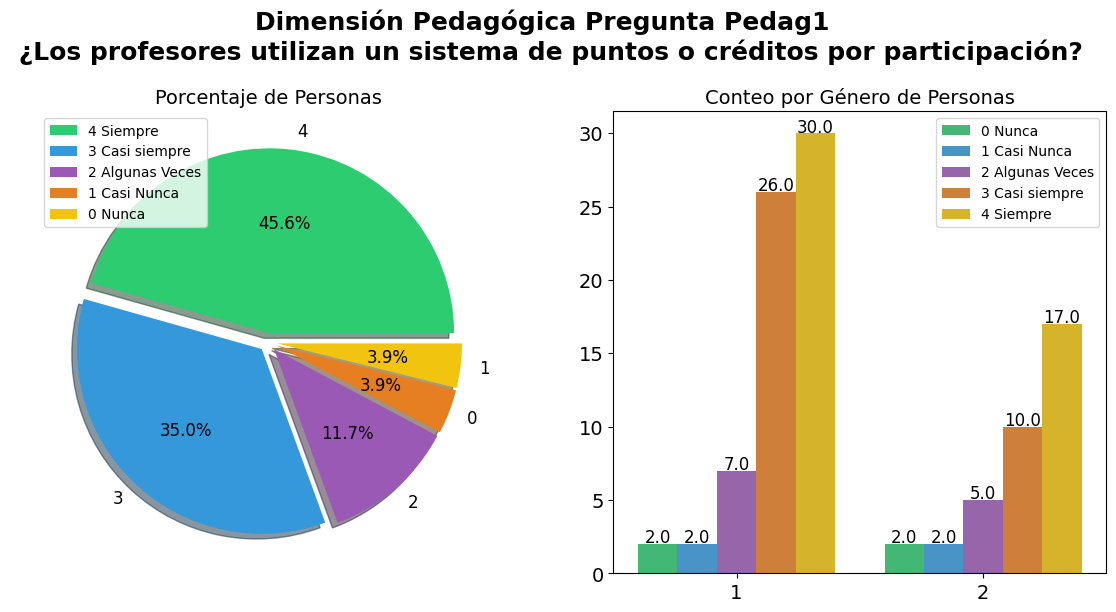

In [55]:
drawChart('Pedagógica','DemoGenero','Pedag1', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05, 0.05, 0.05,0.05), 
          '¿Los profesores utilizan un sistema de puntos o créditos por participación?', sizes=[14,6])
#0 Nunca 
#1 Casi nunca 
#2 Algunas veces  
#3 Casi siempre 
#4 Siempre 
#el 45,6% de los encuestados aducen que los docentes si utilizan un sistema de puntos o créditos por participación en la clase espejo.
#Un 8% aduce que nunca se utiliza dicho sistema.

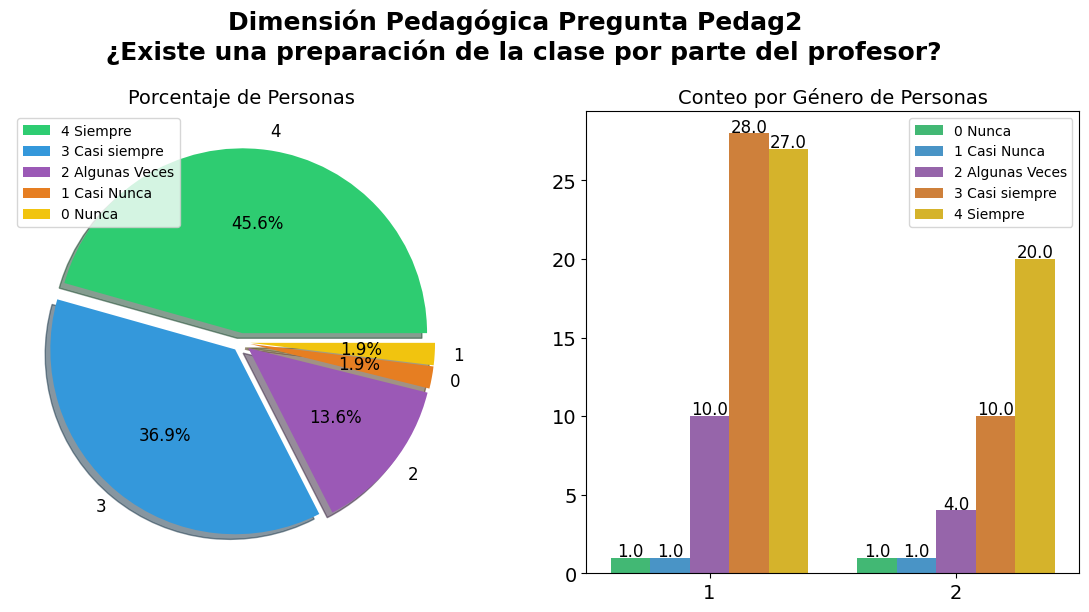

In [56]:
drawChart('Pedagógica','DemoGenero','Pedag2', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Existe una preparación de la clase por parte del profesor?', sizes=[14,6])
          #el 45,6% de los encuestados aducen que los docentes casi siempre preparan la clase espejo a impartir. Un 4% reconoce que no existe preparación 
          #para dicho encuentro.

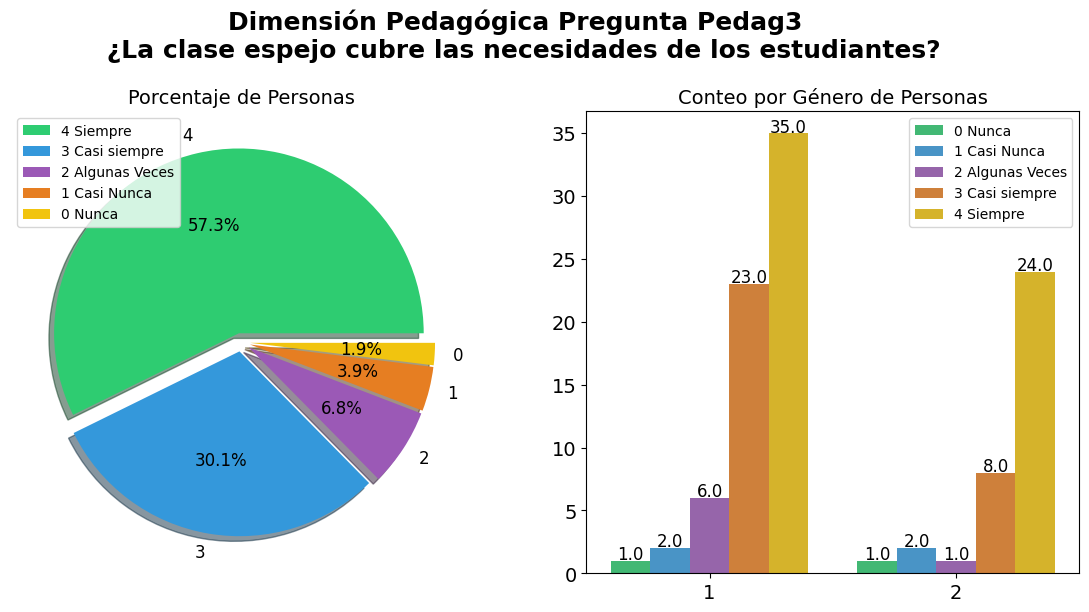

In [57]:
drawChart('Pedagógica','DemoGenero','Pedag3', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La clase espejo cubre las necesidades de los estudiantes?', sizes=[14,6])
          #El 57.3% de las personas aducen que casi siempre se cubre con las necesidades de los estudiantes en la clase espejo.

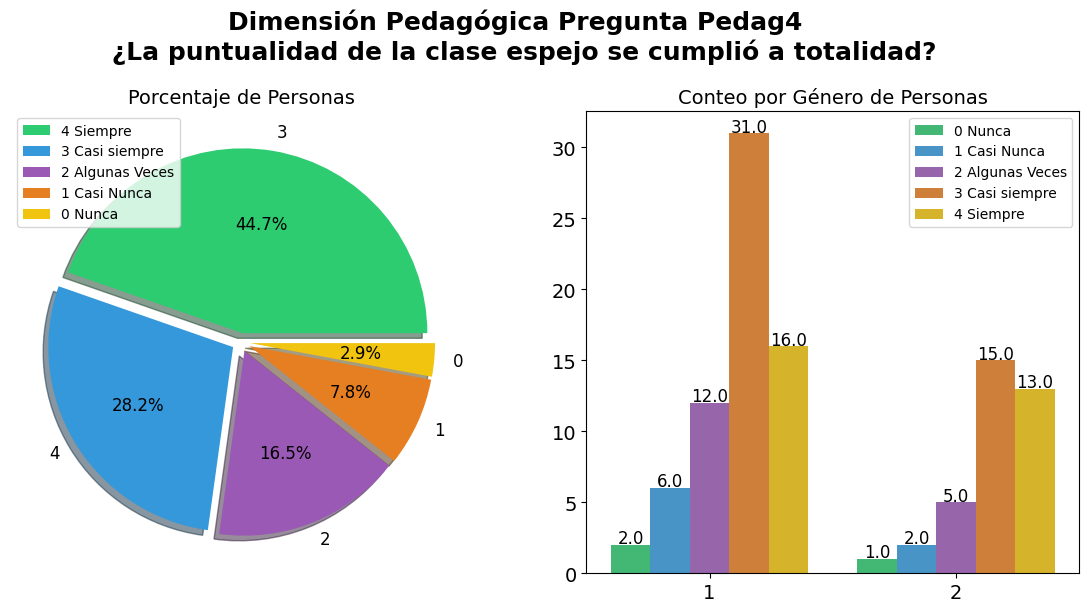

In [58]:
drawChart('Pedagógica','DemoGenero','Pedag4', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La puntualidad de la clase espejo se cumplió a totalidad?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que casi siempre se cumple con el horario de la clase espejo. Un 11% aduce que no se cumple con los horarios
#pactados

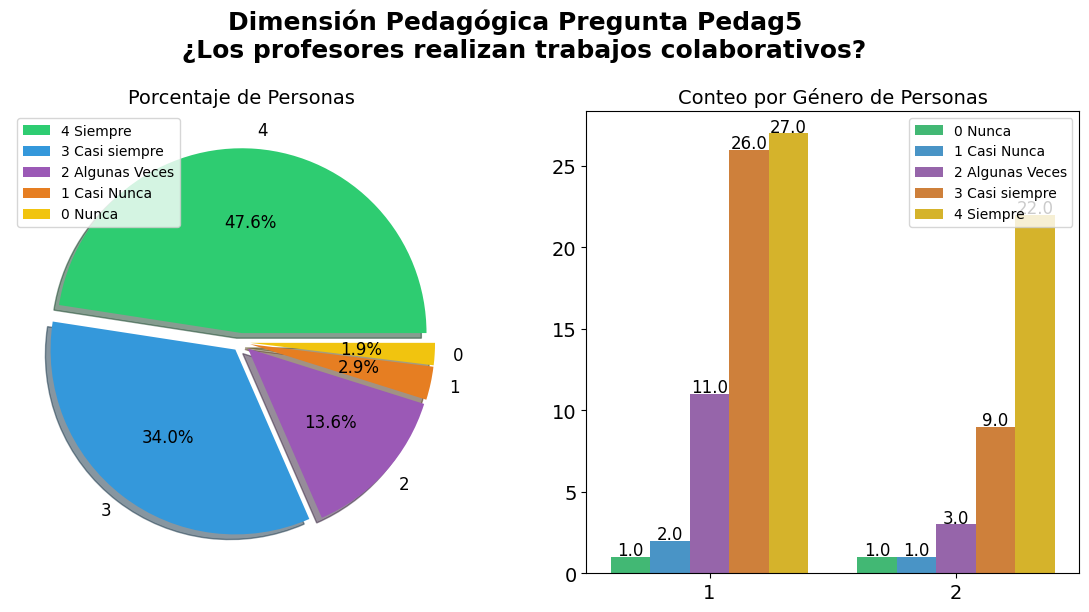

In [59]:
drawChart('Pedagógica','DemoGenero','Pedag5', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores realizan trabajos colaborativos?', sizes=[14,6])
#Algunas veces los profesores realizan trabajos colaborativos durante la clase espejo con un 13,6% de los estudiantes lo afirman

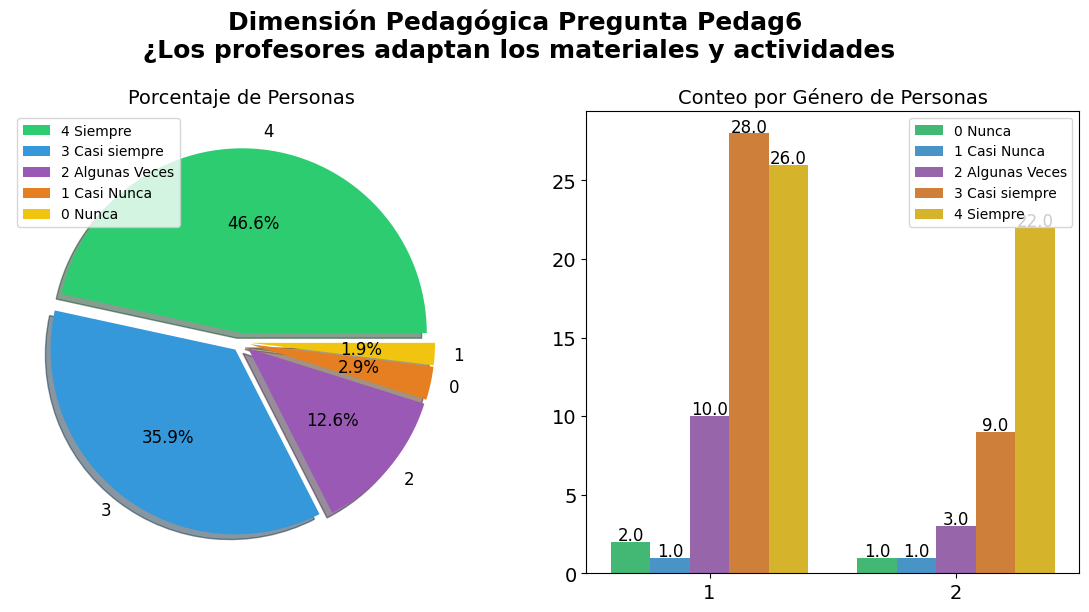

In [60]:
drawChart('Pedagógica','DemoGenero','Pedag6', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores adaptan los materiales y actividades ', sizes=[14,6])
# 

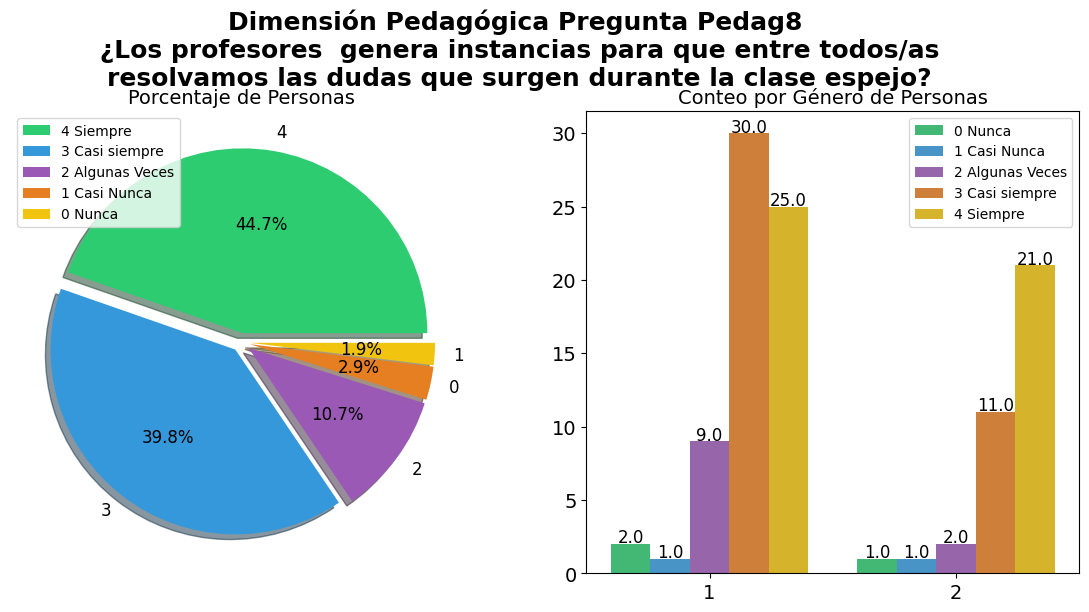

In [61]:
drawChart('Pedagógica','DemoGenero','Pedag8', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  genera instancias para que entre todos/as \nresolvamos las dudas que surgen durante la clase espejo?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que siempre los profesores generan espacios para aclarar dudas.

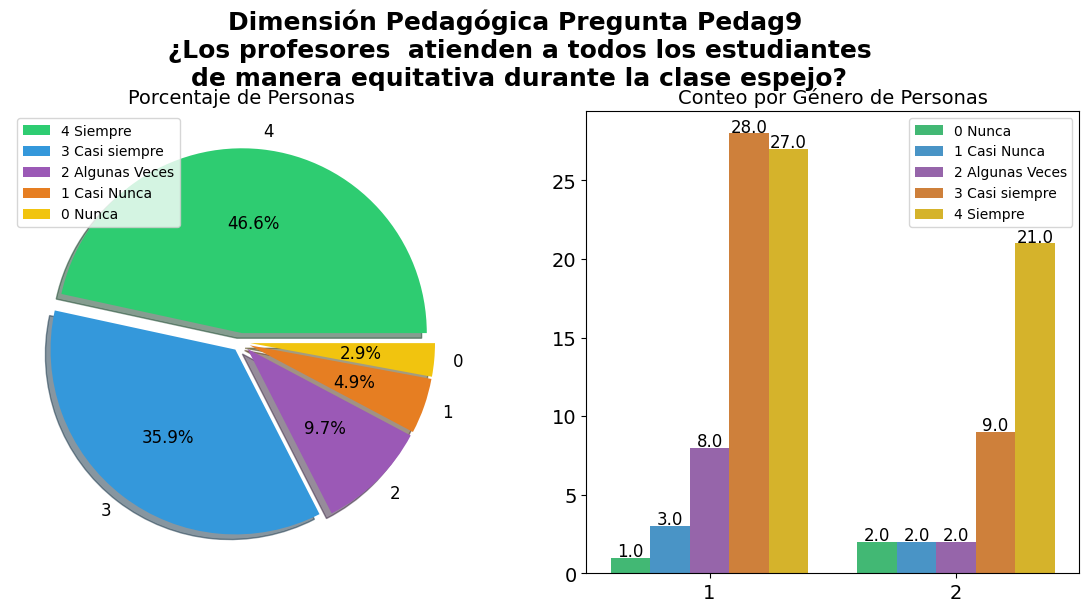

In [62]:
drawChart('Pedagógica','DemoGenero','Pedag9', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  atienden a todos los estudiantes \nde manera equitativa durante la clase espejo?', sizes=[14,6])
          #9,7% de los estudiantes evidencian que no son atendidas sus dudas en las clases espejo.

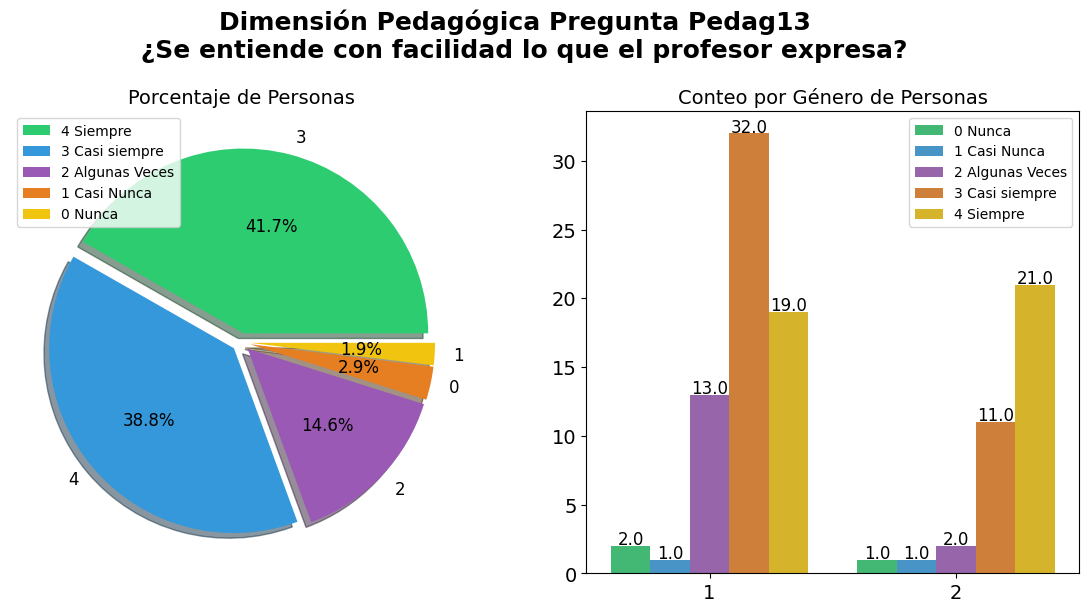

In [63]:
drawChart('Pedagógica','DemoGenero','Pedag13', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Se entiende con facilidad lo que el profesor expresa?', sizes=[14,6])
    #41,7% aducen que casi siempre se entiende lo que el profesor expresa.un 18% reconoce que no se entiende lo explicado por el docente.

In [64]:
datos['LogroAca'].value_counts()

LogroAca
Se cumple Aceptable     70
Se cumple Alto Grado    26
Se cumple Bajo Grado     7
Name: count, dtype: int64

### Paso 4: Normalización, Test de Normalidad, Correlación de Pearson y Alpha de Cronbach

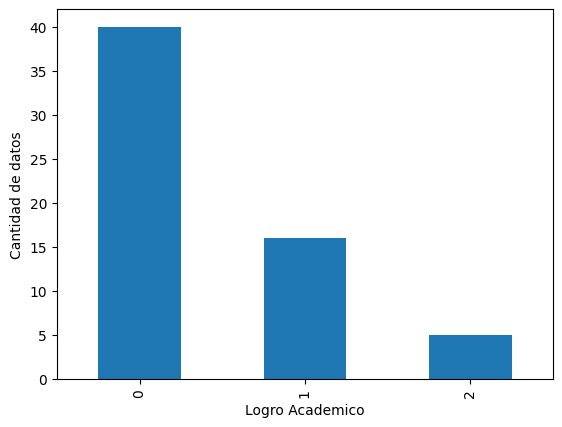

In [65]:

#!pip install scikit-plot
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datos['LogroAca']= label_encoder.fit_transform(datos['LogroAca']) 

## Balance de carga de variables
features = []
for feature in datos.columns:
    if feature != 'LogroAca':
        features.append(feature)
X = datos[features]
y = datos['LogroAca']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=100)

import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Academico')
plt.show()

## Balanceo de datos con RESAMPLE Clase MAYORITARIA

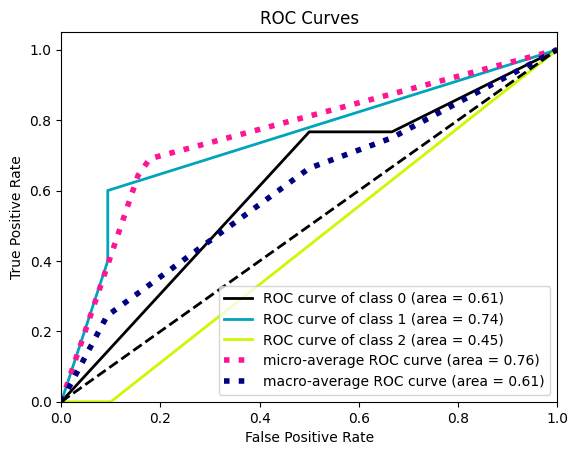

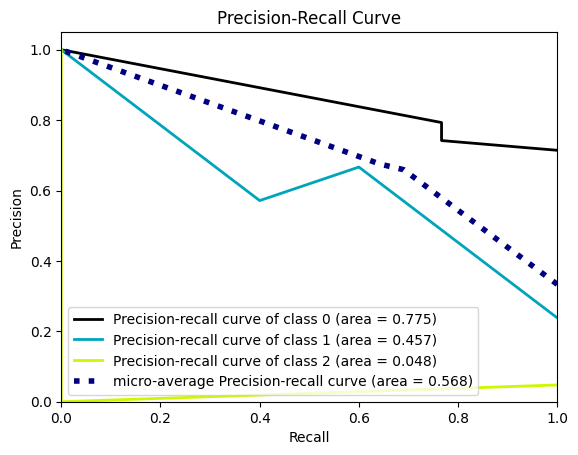

F1-score: 0.6506865041098406


In [66]:
#!pip install scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1}')

In [67]:
y_train.value_counts()

LogroAca
0    40
1    16
2     5
Name: count, dtype: int64

In [68]:
y_test.value_counts()

LogroAca
0    30
1    10
2     2
Name: count, dtype: int64

#### Normalizar datos

In [69]:
datosVie = data
dataLista = X_train

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_train_norm = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [70]:
datosVie = data
dataLista = X_test

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_test_norm = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [71]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(X_train_norm)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,5.746839e-08,No es una variable Normal
1,DemoEdad,9.917787e-08,No es una variable Normal
2,DemoGenero,1.276082e-11,No es una variable Normal
3,DemoSemestre,8.529705e-09,No es una variable Normal
4,DemoPadres,5.039523e-11,No es una variable Normal
5,DemoLaborando,9.417580e-12,No es una variable Normal
6,DemoEsMental,1.296643e-10,No es una variable Normal
7,DemoEsFisico,1.538795e-10,No es una variable Normal
8,DemoTrabajo,8.914555e-11,No es una variable Normal
9,Pedag1,8.192393e-09,No es una variable Normal


In [72]:
iterarCol(X_test_norm)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,5.746839e-08,No es una variable Normal
1,DemoEdad,9.917787e-08,No es una variable Normal
2,DemoGenero,1.276082e-11,No es una variable Normal
3,DemoSemestre,8.529705e-09,No es una variable Normal
4,DemoPadres,5.039523e-11,No es una variable Normal
5,DemoLaborando,9.417580e-12,No es una variable Normal
6,DemoEsMental,1.296643e-10,No es una variable Normal
7,DemoEsFisico,1.538795e-10,No es una variable Normal
8,DemoTrabajo,8.914555e-11,No es una variable Normal
9,Pedag1,8.192393e-09,No es una variable Normal


In [73]:
corr_matrix = X_train_norm.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
205,DemoTrabajo,DemoLaborando,0.967731,0.967731
133,DemoLaborando,DemoTrabajo,0.967731,0.967731
131,DemoLaborando,DemoEsMental,0.963006,0.963006
155,DemoEsMental,DemoLaborando,0.963006,0.963006
180,DemoEsFisico,DemoLaborando,0.962654,0.962654
132,DemoLaborando,DemoEsFisico,0.962654,0.962654
158,DemoEsMental,DemoTrabajo,0.955355,0.955355
206,DemoTrabajo,DemoEsMental,0.955355,0.955355
183,DemoEsFisico,DemoTrabajo,0.930775,0.930775
207,DemoTrabajo,DemoEsFisico,0.930775,0.930775


Text(0.5, 1.0, 'Mapa de Correlación')

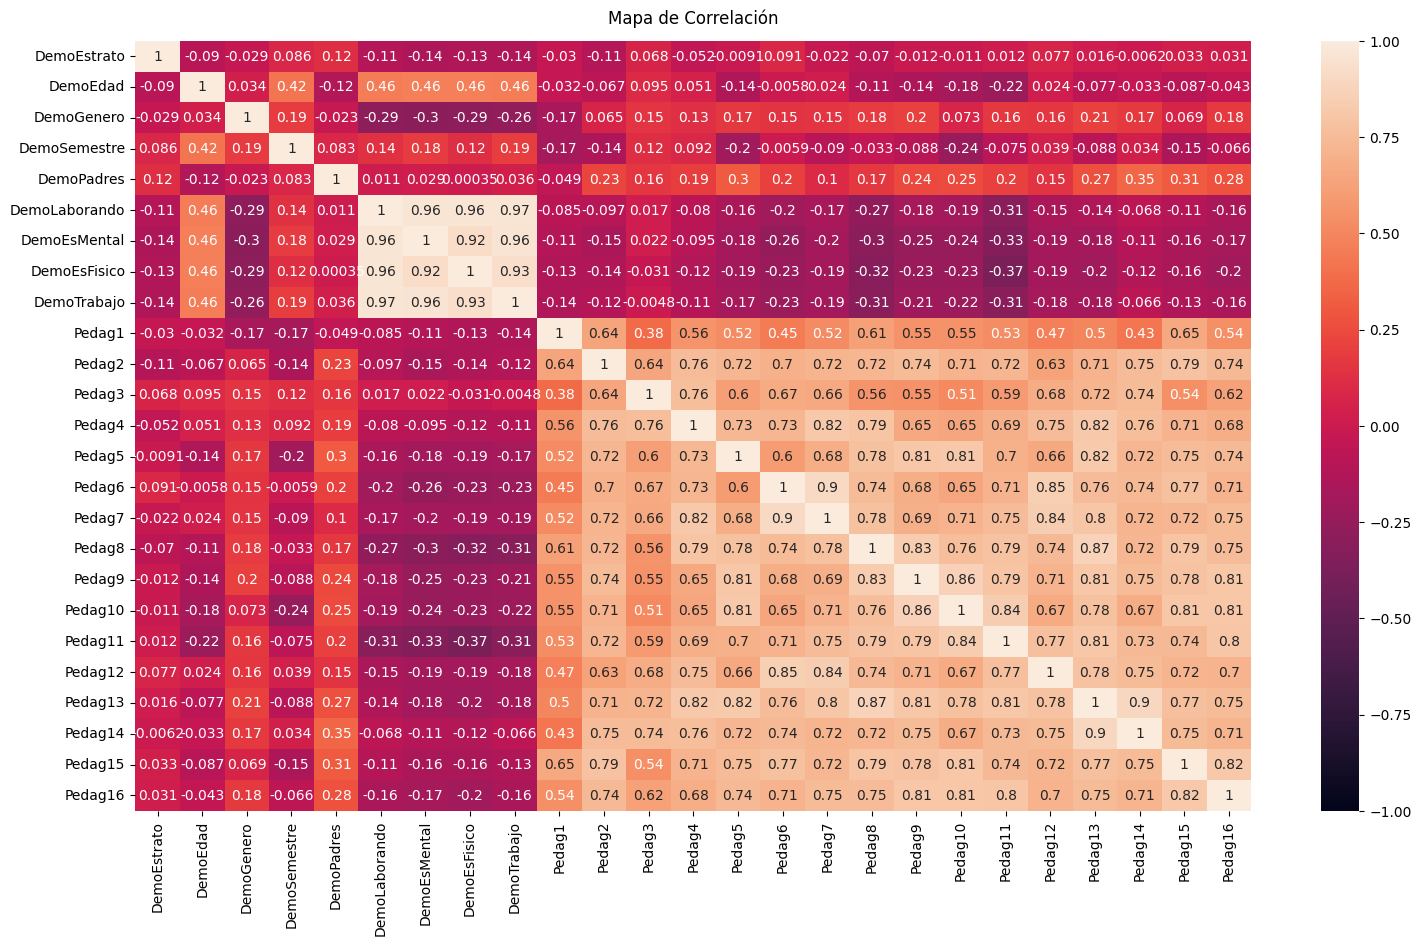

In [74]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [75]:
corr_matrix = X_test_norm.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
155,DemoEsMental,DemoLaborando,0.954563,0.954563
131,DemoLaborando,DemoEsMental,0.954563,0.954563
205,DemoTrabajo,DemoLaborando,0.915184,0.915184
133,DemoLaborando,DemoTrabajo,0.915184,0.915184
132,DemoLaborando,DemoEsFisico,0.903956,0.903956
180,DemoEsFisico,DemoLaborando,0.903956,0.903956
158,DemoEsMental,DemoTrabajo,0.896634,0.896634
206,DemoTrabajo,DemoEsMental,0.896634,0.896634
465,Pedag10,Pedag7,0.871276,0.871276
393,Pedag7,Pedag10,0.871276,0.871276


Text(0.5, 1.0, 'Mapa de Correlación')

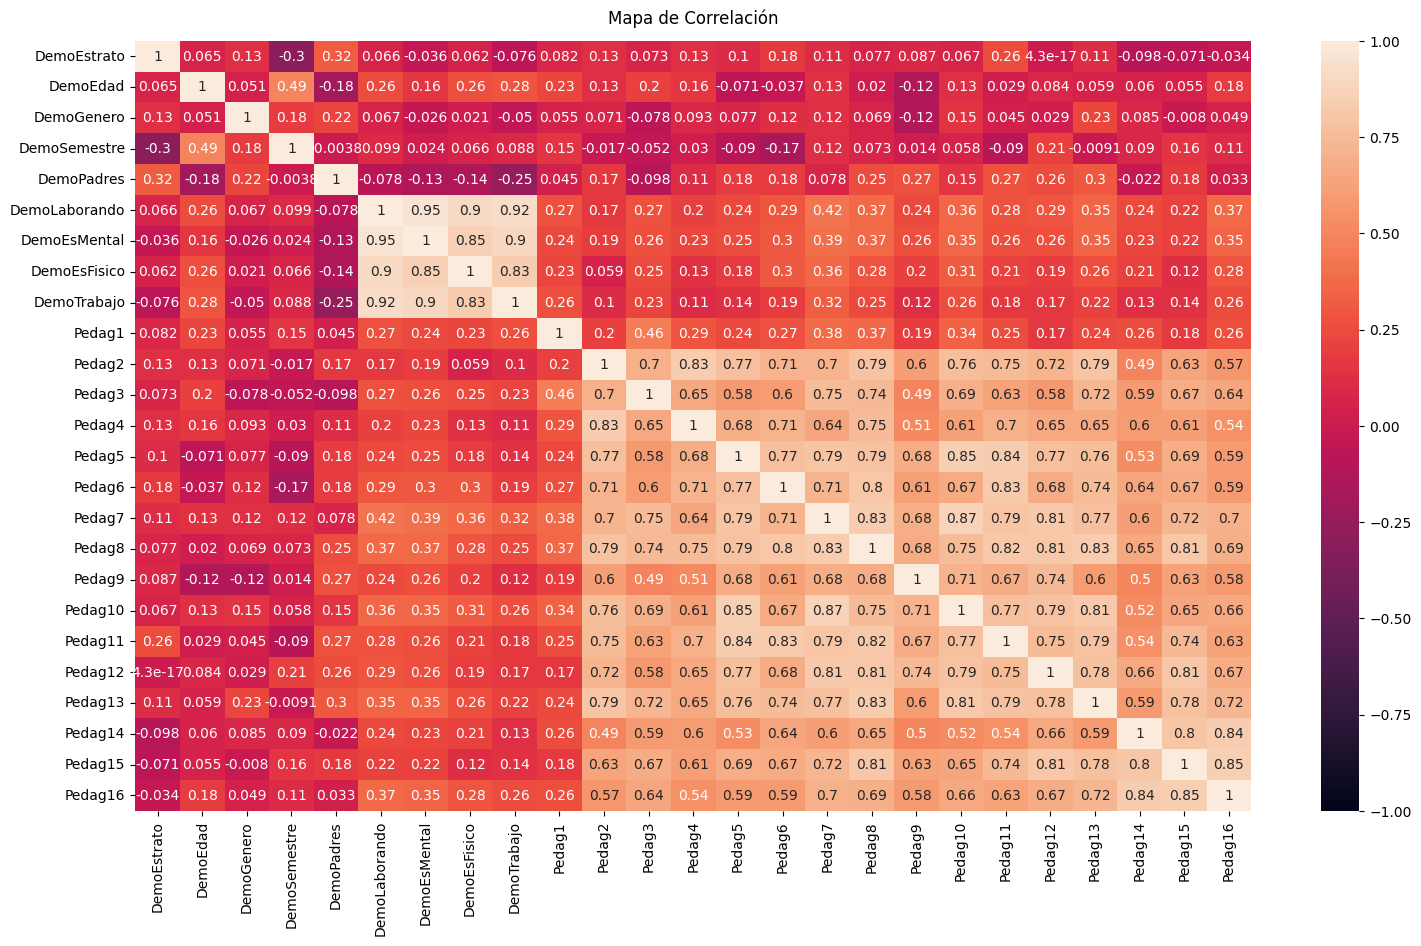

In [76]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [77]:
import pingouin as pg

pg.cronbach_alpha(data=X_train_norm)

datosOrg = X_train_norm[list(X_train_norm.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.89

(0.8555065674249043, array([0.798, 0.903]))

### Paso 5: Modelos Clasificacion sin y con Hiperparámetros, balanceado y sin mejores características

##### 1. Linear Discriminat Analysis: 60% train y 40% test

In [78]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = lda.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6666666666666666


In [79]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))
#https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.58      0.70      0.64        10
           2       0.17      0.50      0.25         2

    accuracy                           0.67        42
   macro avg       0.53      0.62      0.54        42
weighted avg       0.74      0.67      0.69        42



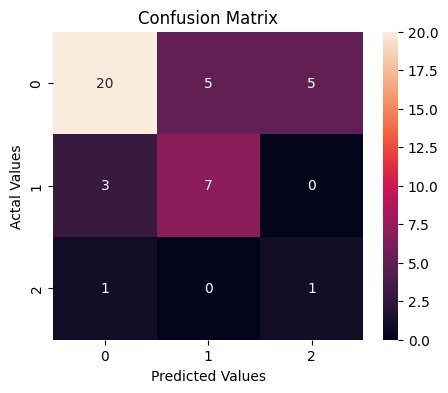

In [80]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()           

#### 1.1. Hiperparámetros LDA

In [81]:
# Crear el modelo
ldaHiper = LinearDiscriminantAnalysis()

# Definir el grid de hiperparámetros
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 1.0],  # shrinkage solo aplica para 'lsqr' y 'eigen'
    'n_components': [1, 2],  # Número de componentes
    'store_covariance': [True, False],
    'tol': [0.0001, 0.001, 0.01]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(ldaHiper , param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_lda = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_lda.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'n_components': 1, 'shrinkage': 0.1, 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}
Accuracy: 0.7619047619047619


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.64      0.70      0.67        10
           2       0.25      0.50      0.33         2

    accuracy                           0.76        42
   macro avg       0.59      0.67      0.61        42
weighted avg       0.80      0.76      0.78        42



#### 2. Maquina de Soporte Vectorial SIN HIPERPARÁMETROS

Accuracy: 0.7857142857142857


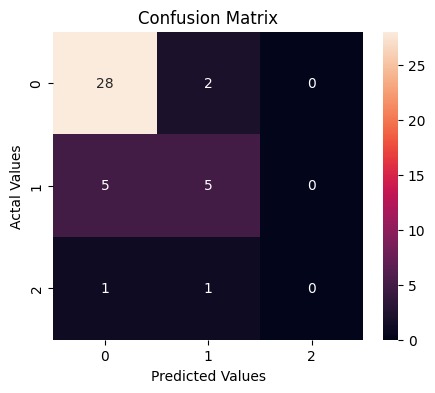

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Crear y entrenar el modelo
svc = SVC()
svc.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = svc.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()       

In [84]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88        30
           1       0.62      0.50      0.56        10
           2       0.00      0.00      0.00         2

    accuracy                           0.79        42
   macro avg       0.48      0.48      0.48        42
weighted avg       0.74      0.79      0.76        42



#### 2.1. Maquina de Soporte Vectorial CON HIPERPARÁMETROS

In [85]:
# Crear el modelo
svc = SVC()

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # relevante solo para el kernel 'poly'
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_svc = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_svc.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 10, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.7857142857142857


In [86]:
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.75      0.30      0.43        10
           2       0.00      0.00      0.00         2

    accuracy                           0.79        42
   macro avg       0.51      0.43      0.44        42
weighted avg       0.74      0.79      0.73        42



### 3. Regresión Logistica Multinomial sin hiperparámetros

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8333333333333334


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       0.83      0.50      0.62        10
           2       0.00      0.00      0.00         2

    accuracy                           0.83        42
   macro avg       0.56      0.50      0.51        42
weighted avg       0.79      0.83      0.80        42



### 3.1. Regresión Logistica Multinomial con hiperparámetros

In [89]:
# Crear el modelo
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l2', 'none'],  # 'none' solo está disponible para ciertos solvers
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_logreg = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_logreg.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.8333333333333334


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       0.83      0.50      0.62        10
           2       0.00      0.00      0.00         2

    accuracy                           0.83        42
   macro avg       0.56      0.50      0.51        42
weighted avg       0.79      0.83      0.80        42



### 4. Naive Bayes sin hiperparámetros

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
gnb = GaussianNB()
gnb.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = gnb.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4523809523809524


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.50      0.58        30
           1       0.38      0.30      0.33        10
           2       0.08      0.50      0.14         2

    accuracy                           0.45        42
   macro avg       0.38      0.43      0.35        42
weighted avg       0.58      0.45      0.50        42



### 4.1. Naive Bayes con hiperparámetros

In [93]:
# Crear el modelo
gnb = GaussianNB()

# Definir el grid de hiperparámetros
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(gnb, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_gnb = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gnb.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'var_smoothing': 1.0}
Accuracy: 0.6666666666666666


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.56      0.90      0.69        10
           2       0.00      0.00      0.00         2

    accuracy                           0.67        42
   macro avg       0.49      0.51      0.48        42
weighted avg       0.78      0.67      0.70        42



### 5. Random Forest sin hiperparámetros

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
rf = RandomForestClassifier()
rf.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7619047619047619


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        30
           1       1.00      0.30      0.46        10
           2       0.00      0.00      0.00         2

    accuracy                           0.76        42
   macro avg       0.59      0.42      0.44        42
weighted avg       0.78      0.76      0.72        42



### 5.1. Random Forest con hiperparámetros

In [97]:
# Crear el modelo
rf = RandomForestClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       0.83      0.50      0.62        10
           2       0.00      0.00      0.00         2

    accuracy                           0.83        42
   macro avg       0.56      0.50      0.51        42
weighted avg       0.79      0.83      0.80        42



### 6. XGBoost sin hiperparámetros

In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8571428571428571


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       0.86      0.60      0.71        10
           2       0.00      0.00      0.00         2

    accuracy                           0.86        42
   macro avg       0.57      0.53      0.54        42
weighted avg       0.82      0.86      0.83        42



### 6.1.  XGBoost con hiperparámetros

In [101]:
# Crear el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsampl

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       0.86      0.60      0.71        10
           2       0.00      0.00      0.00         2

    accuracy                           0.86        42
   macro avg       0.57      0.53      0.54        42
weighted avg       0.82      0.86      0.83        42



### 7.  GBM sin hiperparámetros

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo
gbm = GradientBoostingClassifier()
gbm.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = gbm.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8333333333333334


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.86      0.60      0.71        10
           2       0.33      0.50      0.40         2

    accuracy                           0.83        42
   macro avg       0.69      0.68      0.67        42
weighted avg       0.84      0.83      0.83        42



### 7.1.  GBM con hiperparámetros

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score

# Crear el modelo
gbm = GradientBoostingClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_gbm = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gbm.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.2

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       1.00      0.60      0.75        10
           2       0.00      0.00      0.00         2

    accuracy                           0.86        42
   macro avg       0.61      0.53      0.55        42
weighted avg       0.83      0.86      0.83        42



### 8. Redes Neuronales sin hiperparámetros

In [107]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8095238095238095


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.67      0.80      0.73        10
           2       0.00      0.00      0.00         2

    accuracy                           0.81        42
   macro avg       0.52      0.56      0.54        42
weighted avg       0.80      0.81      0.80        42



### 8.1. Redes Neuronales con hiperparámetros

In [109]:
# Crear el modelo
mlp = MLPClassifier(random_state=42, early_stopping=True)

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_mlp = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_mlp.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, 

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.67        30
           1       0.20      0.30      0.24        10
           2       0.00      0.00      0.00         2

    accuracy                           0.52        42
   macro avg       0.30      0.31      0.30        42
weighted avg       0.55      0.52      0.53        42

